## DS Assignment 2

### Read the Dataset file “BankNote_Authentication_P2.csv” from the dataset folder. Design and train machine
### learning model on given columns(class-Dependent Column). Perform following task in jupyter
### a. Fill the missing values
### b. Decide whether to do Regression or classification. Use at least 2 algorithms for machine learning model
### c. Split data in train test split (75:25 proportion)
### d. Find out the train score, test score of selected models and compare them.
### Note: Scale the data if required.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pltt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## Data Analysis

In [2]:
df= pd.read_csv(r"C:\Users\favin\Downloads\BankNote_Authentication_P2.csv")

print("Rows, Columns:" +str(df.shape))

df

Rows, Columns:(1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
df.head()#first five rows of the data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.isna().sum()#print for any null values

variance    3
skewness    1
curtosis    7
entropy     0
class       0
dtype: int64

In [5]:
null={} #store mean to replace for null values
for col in df.columns:
     if df[col].isnull().sum() > 0:
            print(col,':',df[col].isnull().sum())
            null.update({col:df[col].mean()})

variance : 3
skewness : 1
curtosis : 7


In [6]:
null

{'variance': 0.42919508597516426,
 'skewness': 1.917390504388915,
 'curtosis': 1.4063350731794884}

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1369 non-null   float64
 1   skewness  1371 non-null   float64
 2   curtosis  1365 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1369.000000,1371.000000,1365.000000,1372.000000,1372.000000
mean,0.429195,1.917391,1.406335,-1.191657,0.444606
std,2.843719,5.868308,4.315338,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.778100,-1.711300,-1.557200,-2.413450,0.000000
50%,0.487970,2.313400,0.628630,-0.586650,0.000000
75%,2.820900,6.813100,3.186300,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


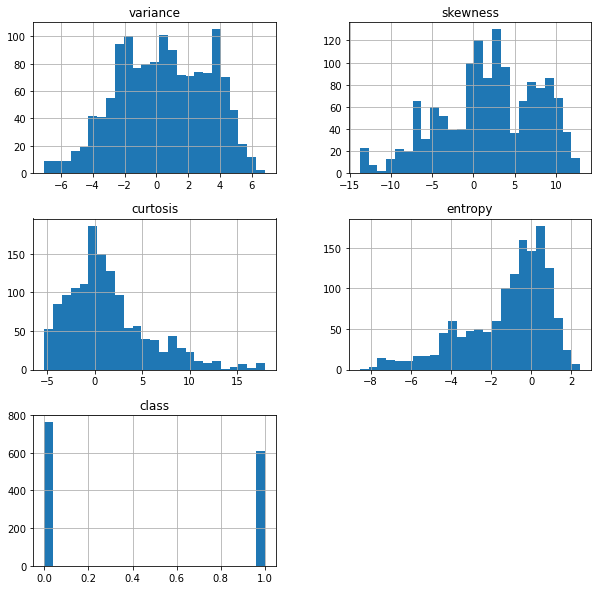

In [9]:
df.hist(bins=25,figsize=(10,10))
# display histogram
pltt.show()

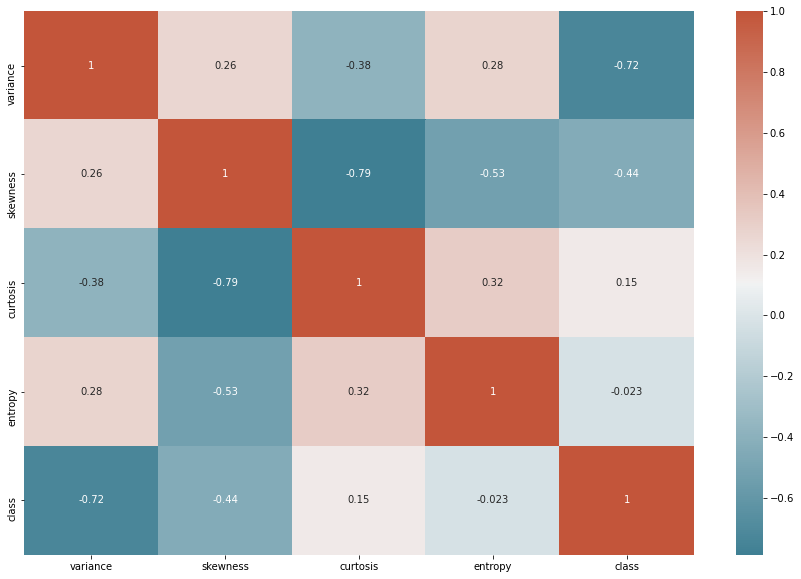

In [10]:
#correlation matrix and heatmap
corr = df.corr()
pltt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
pltt.show()

### Fill in Missing Values

In [11]:
for key, value in null.items():
         df[key]=df[key].fillna(value)
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [12]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## Train and Test

In [13]:
X=df.iloc[:,0:4]

In [14]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [15]:
y=df['class']

In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [17]:
X = StandardScaler().fit_transform(X)
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

In [18]:
X_train

array([[-0.66432415,  1.22850845,  0.07812813, -1.87237162],
       [-1.58749201,  0.17164128, -0.12458928,  0.25604914],
       [-0.47085825, -1.67461486,  1.24905684,  0.73012664],
       ...,
       [ 0.06032776, -0.1565375 , -0.84107716,  0.61376368],
       [ 0.55899477, -0.37002723,  0.87487653,  1.07985212],
       [-0.88220923,  1.51856498,  0.28762262, -1.73567343]])

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=20)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
t_acc=model.predict(X_train)

In [20]:
print('DecisionTreeClassifier')
print("Train: ",accuracy_score(y_train, t_acc)*100,"%")
print("Test: ",accuracy_score(y_test, y_pred)*100,"%")

DecisionTreeClassifier
Train:  100.0 %
Test:  98.54368932038835 %


In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[228   4]
 [  2 178]]


In [22]:
from xgboost import XGBClassifier
model1 = XGBClassifier(n_estimators=100,use_label_encoder=False)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
t_acc1=model1.predict(X_train)

[01:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
print('XGBClassifier')
print("Train: ",accuracy_score(y_train, t_acc1)*100,"%")
print("Test: ",accuracy_score(y_test, y_pred1)*100,"%")

XGBClassifier
Train:  100.0 %
Test:  99.27184466019418 %


In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1))

[[229   3]
 [  0 180]]
